<a href="https://colab.research.google.com/github/mlelarge/dataflowr/blob/master/Notebooks/02_backprop_full_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple implementation of backprop

Here we implement a simple backpropagation algorithm with `numpy` for the following problem:

We generate points $(x_i,y_i)$ where $y_i= \exp(w^*x_i+b^*)$, i.e $y^*_i$ is obtained by applying a deterministic function to $x_i$ with parameters $w^*$ and $b^*$. Our goal is to recover the parameters $w^*$ and $b^*$ from the observations $(x_i,y_i)$.

To do this, we use SGD to minimize $\sum_i(y^i - \exp(w x_i+b))^2$ with respect to $w$ and $b$.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
w, b = 0.5, 2
xx = np.arange(0,1,.01)
yy = np.exp(w*xx+b)

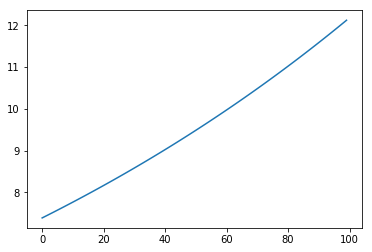

In [3]:
plt.plot(yy)

Following what we just saw in the course, you need to implement each of the basic operations: `(.*w), (.+b), exp(.)` with a forward method, a backward method and a step method.

In [0]:
class add_bias(object):
    def __init__(self,b):
        # initialize with a bias b
        self.b = b
        
    def forward(self, x):
        # return the result of adding the bias
        return x+self.b
    
    def backward(self,grad):
        # save the gradient (to update the bias in the step method) and return the gradient backward
        self.grad = grad
        return self.grad
    
    def step(self, learning_rate):
        # update the bias
        self.b -= learning_rate*self.grad
    
class multiplication_weight(object):
    def __init__(self, w):
        # initialize with a weight w
        self.w = w
        
    def forward(self, x):
        # return the result of multiplying by weight
        self.saved_x = x
        return self.w*x
        
    def backward(self,grad):
        # save the gradient and return the gradient backward
        self.grad = self.saved_x*grad
        return self.grad
    
    def step(self, learning_rate):
        # update the weight
        self.w -= learning_rate*self.grad

class my_exp(object):
    # no parameter
    def forward(self, x):
        # return exp(x)
        self.saved_exp = np.exp(x)
        return np.exp(x)
    
    def backward(self,grad):
        # return the gradient backward
        return self.saved_exp*grad
    
    def step(self, learning_rate):
        # any parameter to update?
        pass

Now, you will need to compose sequentially these operations and here you need to code a class composing operations. This class will have a forward, a backward and a step method and also a compute_loss method.

In [0]:
class my_composition(object):
    def __init__(self, layers):
        # initialize with all the operations (called layers here!) in the right order...
        self.layers = layers
        
    def forward(self, x):
        # apply the forward method of each layer
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def compute_loss(self,y, y_est):
        # use the L2 loss
        # return the loss and save the gradient of the loss
        self.loss_grad  = 2*(y-y_est)
        return (y-y_est)**2
    
    def backward(self):
        # apply backprop sequentially, starting from the gradient of the loss
        current_grad = self.loss_grad
        for layer in reversed(self.layers):
            current_grad = layer.backward(current_grad)
    
    def step(self, learning_rate):
        # apply the step method of each layer
        for layer in self.layers:
            layer.step(learning_rate)

Now you need to code the 'training' loop. Keep track of the loss, weight and bias computed at each epoch.

In [0]:
my_fit = my_composition([multiplication_weight(1),add_bias(1), my_exp()])
learning_rate = 1e-4
losses =[]
ws = []
bs = []
for i in range(5000):
    # take a random indice
    j = np.random.randint(1, len(xx))
    # you can compare with
    #j = i % len(xx)
    # compute the estimated value of y with the current values of the parameters
    y_est = my_fit.forward(xx[j])
    # compute the loss and save it
    loss = my_fit.compute_loss(y_est,yy[j])
    losses.append(loss)
    # update the parameters and save them
    my_fit.backward()
    my_fit.step(learning_rate)
    ws.append(my_fit.layers[0].w)
    bs.append(my_fit.layers[1].b)

In [7]:
my_fit.layers[0].w

0.5053348108157413

In [8]:
my_fit.layers[1].b

1.9967109086883414

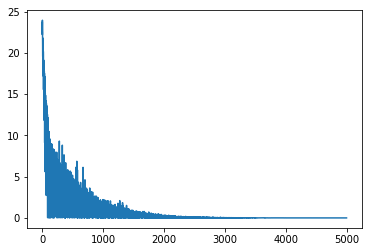

In [9]:
plt.plot(losses)

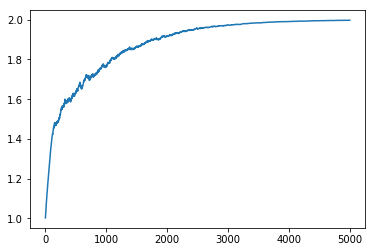

In [10]:
plt.plot(bs)

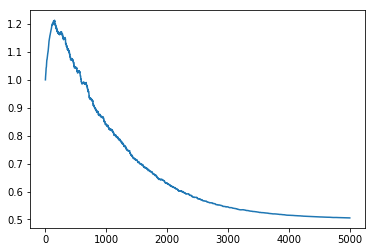

In [11]:
plt.plot(ws)